# 0. 서론

## 0.0 주제

✏ 교육소외지수 개발 및 이를 활용한 교육프로그램 우선배치 초등학교 입지선정

## 0.1 연구배경



*   코로나19의 장기화로 인해 교육격차에 대한 사회적 우려의 증가
*   코로나로 인한 학습 손실을 보충하지 못할 경우, GDP가 1.5% 떨어질 수 있다는 OECD의 경고
*   교육격차 해소를 위해 온라인 강의를 무료로 제공하는 등 비대면적 지원이 있었지만, 이는 교육격차 해소에 도움이 되지 않았다는 학생들의 반응과 여론
*   대면 프로그램의 필요성의 느꼈으나, 모든 학교에서 프로그램을 시행하기에 비효율적, 인력부족 등의 현실적인 어려움이 존재
*   따라서 본 연구를 통해 교육격차 해소 프로그램이 가장 필요한 서울의 구와, 그 중에서도 프로그램을 우선 배치할 초등학교를 선정하고자 함



## 0.2 연구개요



1.   교육소외지수 개발
- 「교육격차 실증연구의 체계적 분석」, 박주호,백종면, 한국교육문제연구, 2019 논문을 토대로 교육격차에 영향을 미치는 아래의 7가지 지표선정

  1️⃣ 사교육 참여 정도

  2️⃣ 가정의 사회경제적 지위

  3️⃣ 부모의 자녀에 대한 기대 및 지원

  4️⃣ 편부모 가정 여부

  5️⃣ 다문화 가정 여부

  6️⃣ 교육 환경

  7️⃣ 교육 재정 투자 현황




2.   프로그램을 배치할 최적의 구와 초등학교 선정
- 초등학교 교사 20명에게 얻은 설문조사를 바탕으로 AHP기법을 활용하여 각 지표에 대한 가중치 선정
- 가중치를 바탕으로 최적의 구와 초등학교 선정

# 1. 프로그램을 배치할 최적의 구 선정

## 1.1 library 및 data 불러오기

In [298]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import requests
import json
import folium
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [299]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [300]:
# data path 설정
dpath = '/content/drive/MyDrive/dacon/'

In [301]:
# Raw_Data 불러오기
file_private_education = '학생1만명당_사설학원수.csv'                # 사교육 참여 지표
file_household_income = '서울서베이 가구주_데이터.csv'               # 가정의 SES(사회경제적지위) 지표
file_financial_support = '가계소비지출현황.csv'                      # 부모의 자녀 기대 및 지원 지표
file_total_household = '가구원수별_가구수.csv'                       # 자치구별 전체 가구 수(편부모, 다문화 지표 생성시 필요)
fiie_single_parent = '저소득_한부모가족.csv'                         # 편부모 가정 지표 생성
file_multicultural = '다문화가정학생현황.csv'                        # 다문화 가정 지표
file_education_environment = '교육환경만족도.csv'                    # 학교특성 지표
file_educational_finance = '교육재정지원현황.csv'                    # 교육재정 자표

##1.2 데이터 전처리 및 통합데이터 생성

### 1.2.1 사교육 참여 지표 생성

**'자치구별 학생 1만명당 사설 학원 수'** data를 이용해 **'자치구별 학생1만명당 사설 학원 수'**를 구하였습니다.  
* 사교육 참여 지표 = 자치구별 학생1만명당 사설 학원 수

In [302]:
# 데이터 불러오기
private_education = pd.read_csv(dpath + file_private_education)

In [303]:
private_education.head()

,자치구별(1),자치구별(2),2007,2007.1,2007.2,2008,2008.1,2008.2,2009,2009.1,...,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2
0,자치구별(1),자치구별(2),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),...,학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소),초·중·고 학생수 (명),사설학원수 (개소),학생1만명당 사설학원수 (개소)
1,합계,소계,1396357,11549,82.7,1361007,12006,88.2,1322427,12086,...,156.3,866395,14044,162.1,840933,13992,166.4,825503,13809,167.3
2,합계,종로구,30160,136,45.1,29796,260,87.3,29302,255,...,148.4,17363,259,149.2,16452,243,147.7,15912,217,136.4
3,합계,중구,25628,80,31.2,24892,145,58.3,23835,143,...,80.7,14115,118,83.6,13566,109,80.3,12798,91,71.1
4,합계,용산구,28793,88,30.6,28742,160,55.7,27663,159,...,88.5,16852,155,92.0,15852,154,97.1,15116,137,90.6


In [304]:
# index 및 colum명 변경
private_education.rename(columns = {'2021.2':'학생1만명당 사설학원수 (개소)','자치구별(2)': '자치구별'},inplace=True)
private_education = private_education.set_index('자치구별')

# 필요한 칼럼만 추출
private_education = private_education[['학생1만명당 사설학원수 (개소)']]
private_education.drop(labels=['자치구별(2)', '소계'],axis=0,inplace=True)

In [305]:
private_education

,학생1만명당 사설학원수 (개소)
자치구별,
종로구,136.4
중구,71.1
용산구,90.6
성동구,149.1
광진구,149.9
동대문구,138.2
중랑구,97.3
성북구,121.4
강북구,101.5


####1.2.1.1 사교육 참여 지표 시각화




In [306]:
# 사교육 참여 지표(사설 학원 수) 시각화
geo_local = Nominatim(user_agent='South Korea')


In [307]:
# 서울 행정구역 json raw파일
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [308]:
# 서울시 구별 시각화
pe_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(pe_map)


In [309]:
re_pe = private_education.reset_index()
re_pe['학생1만명당 사설학원수 (개소)'] = re_pe['학생1만명당 사설학원수 (개소)'].astype(float)

In [310]:
 re_pe_index = re_pe.set_index('자치구별')
 re_pe_index

,학생1만명당 사설학원수 (개소)
자치구별,
종로구,136.4
중구,71.1
용산구,90.6
성동구,149.1
광진구,149.9
동대문구,138.2
중랑구,97.3
성북구,121.4
강북구,101.5


In [311]:
pe_map.choropleth(geo_data=seoul_geo,
             data=re_pe_index['학생1만명당 사설학원수 (개소)'], 
             columns = [re_pe_index.index, re_pe_index['학생1만명당 사설학원수 (개소)']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

pe_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.2 가정의 SES(사회경제적지위) 지표 생성

**'서울서베이'** data를 통해  **'자치구별 가정의 평균 소득'**을 구하였습니다.  
* 가정의 SES(사회경제적지위) 지표 = 자치구별 가정의 평균 소득

In [312]:
# 데이터 불러오기
household_income = pd.read_csv(dpath + file_household_income)

In [313]:
household_income.head()

,ID,GU,FAM1,FAM15,SQ0_1,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,...,DE3,DE4,DE5,DE6,DE7,DE8,DE9,DE10,wta1,wta2
0,1,110,2,2,1,1,1,1,1,1953,...,2.0,1.0,1.0,2.0,3.0,110.0,1.0,3.0,180.452,0.906
1,2,110,1,1,1,1,2,1,2,1975,...,3.0,1.0,2.0,1.0,4.0,110.0,1.0,2.0,92.504,0.465
2,3,110,3,3,2,1,1,1,1,1966,...,3.0,1.0,1.0,3.0,5.0,110.0,1.0,1.0,37.541,0.189
3,4,110,2,2,1,1,1,1,1,1985,...,3.0,1.0,1.0,2.0,4.0,110.0,1.0,2.0,87.824,0.441
4,5,110,4,4,1,1,2,1,1,1973,...,4.0,1.0,2.0,4.0,5.0,110.0,1.0,1.0,205.815,1.034


In [314]:
# 명목형으로 나타나 있던 가구소득 -> 실제 소득으로 변환
def invert_income(income_code):
    if income_code == 1: real_income = 50   
    elif income_code == 19: real_income = 950
    elif income_code == 20: real_income = 1000

    real_income  = 25 + 50*(income_code-1)   # 나머지 값은 해당 규칙 따름
    return real_income


# 자치구 코드 실제 구이름으로 변경
def invert_district(district_code):
    if district_code == 110: real_district = '종로구'
    elif district_code == 140: real_district = '중구'
    elif district_code == 170: real_district = '용산구'
    elif district_code == 200: real_district = '성동구'
    elif district_code == 215: real_district = '광진구'
    elif district_code == 230: real_district = '동대문구'
    elif district_code == 260: real_district = '중랑구'
    elif district_code == 290: real_district = '성북구'
    elif district_code == 305: real_district = '강북구'
    elif district_code == 320: real_district = '도봉구'
    elif district_code == 350: real_district = '노원구'
    elif district_code == 380: real_district = '은평구'
    elif district_code == 410: real_district = '서대문구'
    elif district_code == 440: real_district = '마포구'
    elif district_code == 470: real_district = '양천구'
    elif district_code == 500: real_district = '강서구'
    elif district_code == 530: real_district = '구로구'
    elif district_code == 545: real_district = '금천구'
    elif district_code == 560: real_district = '영등포구'
    elif district_code == 590: real_district = '동작구'
    elif district_code == 620: real_district = '관악구'
    elif district_code == 650: real_district = '서초구'
    elif district_code == 680: real_district = '강남구'
    elif district_code == 710: real_district = '송파구'
    elif district_code == 740: real_district = '강동구'
    
    return real_district

In [315]:
#index 및 colum명 변경
household_income.rename(columns = {'GU':'자치구별', 'AAQ1':'월평균 가구소득'},inplace=True)

# 필요한 칼럼만 추출
household_income = household_income[['월평균 가구소득', '자치구별']]
household_income['월평균 가구소득'] = household_income['월평균 가구소득'].apply(invert_income)
household_income['자치구별'] = household_income['자치구별'].apply(invert_district)

# 같은 자치구끼리 평균 가구소득 구하기
household_income = household_income.groupby('자치구별').mean().round(2)

In [316]:
household_income

,월평균 가구소득
자치구별,
강남구,592.26
강동구,465.00
강북구,485.27
강서구,447.97
관악구,378.88
광진구,462.95
구로구,469.00
금천구,398.51
노원구,491.82


####1.2.2.1 SES 지표 시각화




In [317]:
re_ic = household_income.reset_index()

In [318]:
# 서울시 구별 시각화
ic_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(ic_map)

In [319]:
re_ic['월평균 가구소득'] = re_ic['월평균 가구소득'].astype(float)

In [320]:
 re_ic_index = re_ic.set_index('자치구별')
 re_ic_index

,월평균 가구소득
자치구별,
강남구,592.26
강동구,465.00
강북구,485.27
강서구,447.97
관악구,378.88
광진구,462.95
구로구,469.00
금천구,398.51
노원구,491.82


In [321]:
ic_map.choropleth(geo_data=seoul_geo,
             data=re_ic_index['월평균 가구소득'], 
             columns = [re_ic_index.index, re_ic_index['월평균 가구소득']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

ic_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.3 부모의 자녀 기대 및 지원 지표 생성

**'가계소비지출현황'** data를 이용해 **'가계소비지출 중 사교육비 비중'**을 구하였습니다.  
*  부모의 자녀 기대 및 지원 지표 = 가계소비지출 중 사교육비 비중

In [322]:
# 데이터 불러오기
financial_support = pd.read_csv(dpath + file_financial_support)

In [323]:
financial_support.head(10)

,자치구별(1),지출현황별(1),지출현황별(2),2006
0,서울시,사교육비비중,소계,11.5
1,서울시,사교육비비중정도,1~19%,66.4
2,서울시,사교육비비중정도,20~39%,24.1
3,서울시,사교육비비중정도,40~59%,8.6
4,서울시,사교육비비중정도,60+,0.9
5,서울시,주거비비중,소계,25.3
6,서울시,주거비비중정도,1~19%,33.8
7,서울시,주거비비중정도,20~39%,43.8
8,서울시,주거비비중정도,40~59%,17.5
9,서울시,주거비비중정도,60+,4.9


In [324]:
# index 및 colum명 변경
financial_support.rename(columns = {'2006':'사교육비비중', '자치구별(1)':'자치구별'},inplace=True)
financial_support = financial_support.set_index('자치구별')

# 필요한 칼럼만 추출
idx = financial_support['지출현황별(1)'] == '사교육비비중'
financial_support = financial_support[idx]
financial_support.drop(labels=['지출현황별(1)', '지출현황별(2)'],axis=1,inplace=True)
financial_support.drop(labels=['서울시'],axis=0,inplace=True)

In [325]:
financial_support

,사교육비비중
자치구별,
종로구,11.3
중구,13.1
용산구,9.4
성동구,11.7
광진구,9.8
동대문구,14.4
중랑구,10.1
성북구,7.9
강북구,9.9


####1.2.3.1 부모의 자녀 기대 및 지원 지표 시각화




In [326]:
re_fs = financial_support.reset_index()
re_fs

,자치구별,사교육비비중
0,종로구,11.3
1,중구,13.1
2,용산구,9.4
3,성동구,11.7
4,광진구,9.8
5,동대문구,14.4
6,중랑구,10.1
7,성북구,7.9
8,강북구,9.9
9,도봉구,11.8


In [327]:
# 서울시 구별 시각화
fs_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(fs_map)

In [328]:
re_fs['사교육비비중'] = re_fs['사교육비비중'].astype(float)

In [329]:
 re_fs_index = re_fs.set_index('자치구별')
 re_fs_index

,사교육비비중
자치구별,
종로구,11.3
중구,13.1
용산구,9.4
성동구,11.7
광진구,9.8
동대문구,14.4
중랑구,10.1
성북구,7.9
강북구,9.9


In [330]:
fs_map.choropleth(geo_data=seoul_geo,
             data=re_fs_index['사교육비비중'], 
             columns = [re_fs_index.index, re_fs_index['사교육비비중']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

fs_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.4 편부모 가정 지표 생성

**'저소득 한부모가족'** data를 활용해 **'자치구별 편부모 가정 비율'**을 구하였습니다.  
* 편부모 가정 지표 = 자치구별 편부모 가구수 / 자치구별 전체 가구수 * 100

1) 자치구별 전체 가구수 계산

In [331]:
# 데이터 불러오기
total_household = pd.read_csv(dpath + file_total_household)

In [332]:
total_household.head()

,동별(1),동별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,동별(1),동별(2),계,계,계,계,계,계,계,계
1,동별(1),동별(2),소계,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인이상가구
2,합계,소계,4046799,1489893,1056278,779155,573191,119907,23017,5358
3,합계,종로구,63984,27308,16320,10690,7367,1826,381,92
4,합계,중구,56116,24544,15118,9141,5654,1282,298,79


In [333]:
# index 및 colum명 변경
total_household.rename(columns = {'동별(2)':'자치구별','2021':'자치구별 전체 가구수'},inplace=True)
total_household = total_household.set_index('자치구별')

# 필요한 칼럼만 추출
total_household = total_household[['자치구별 전체 가구수']]
total_household.drop(labels=['동별(2)', '소계'],axis=0,inplace=True)

In [334]:
total_household

,자치구별 전체 가구수
자치구별,
종로구,63984
중구,56116
용산구,96989
성동구,122756
광진구,153962
동대문구,153246
중랑구,167260
성북구,181827
강북구,130329


2) 자치구별 편부모 가구수 계산

In [335]:
# 데이터 불러오기
single_parent = pd.read_csv(dpath + fiie_single_parent)

In [336]:
single_parent.head()

,자치구(1),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13
0,자치구(1),합계,합계,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,한부모가족지원법 수급자,국민기초생활보장법 수급자,국민기초생활보장법 수급자,국가보훈법 수급자,국가보훈법 수급자
1,자치구(1),합계,합계,합계,합계,재가보호,재가보호,시설보호,시설보호,미보호,미보호,국민기초생활보장법 수급자,국민기초생활보장법 수급자,국가보훈법 수급자,국가보훈법 수급자
2,자치구(1),가구수,가구원수,가구수,가구원수,가구수,가구원수,가구수,가구원수,가구수,가구원수,가구수,가구원수,가구수,가구원수
3,계,31425,72671,6140,20501,6068,20429,72,72,-,-,25285,52170,-,-
4,종로구,334,763,114,332,112,330,2,2,-,-,220,431,-,-


In [337]:
# index 및 colum명 변경
single_parent.rename(columns = {'자치구(1)':'자치구별','2020':'자치구별 편부모 가구수'},inplace=True)
single_parent = single_parent.set_index('자치구별')

# 필요한 칼럼만 추출
single_parent = single_parent[['자치구별 편부모 가구수']]
single_parent.drop(labels=['자치구(1)', '계'],axis=0,inplace=True)

3) 편부모 가정 지표계산(자치구별 편부모 가구수 / 자치구별 전체 가구수 * 100)

In [338]:
# 숫자 계산 가능하도록 int형으로 변환
total_household[['자치구별 전체 가구수']] = total_household[['자치구별 전체 가구수']].apply(pd.to_numeric)
single_parent[['자치구별 편부모 가구수']] = single_parent[['자치구별 편부모 가구수']].apply(pd.to_numeric)

# 편부모 가정 지표 계산
single_parent_ratio = single_parent['자치구별 편부모 가구수'] / total_household['자치구별 전체 가구수'] *100
single_parent['자치구별 전체 가구수'] = total_household['자치구별 전체 가구수']
single_parent['편부모 가정 비율'] = single_parent_ratio

In [339]:
single_parent

,자치구별 편부모 가구수,자치구별 전체 가구수,편부모 가정 비율
자치구별,,,
종로구,334,63984,0.522006
중구,360,56116,0.641528
용산구,586,96989,0.604192
성동구,750,122756,0.610968
광진구,1218,153962,0.791104
동대문구,1130,153246,0.737377
중랑구,2228,167260,1.332058
성북구,1406,181827,0.773262
강북구,1828,130329,1.402604


####1.2.4.1 편부모 가정 지표 시각화




In [340]:
re_sp = single_parent.reset_index()
re_sp

,자치구별,자치구별 편부모 가구수,자치구별 전체 가구수,편부모 가정 비율
0,종로구,334,63984,0.522006
1,중구,360,56116,0.641528
2,용산구,586,96989,0.604192
3,성동구,750,122756,0.610968
4,광진구,1218,153962,0.791104
5,동대문구,1130,153246,0.737377
6,중랑구,2228,167260,1.332058
7,성북구,1406,181827,0.773262
8,강북구,1828,130329,1.402604
9,도봉구,1624,128439,1.264413


In [341]:
# 서울시 구별 시각화
sp_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(sp_map)

In [342]:
re_sp['편부모 가정 비율'] = re_sp['편부모 가정 비율'].astype(float)

In [343]:
 re_sp_index = re_sp.set_index('자치구별')
 re_sp_index

,자치구별 편부모 가구수,자치구별 전체 가구수,편부모 가정 비율
자치구별,,,
종로구,334,63984,0.522006
중구,360,56116,0.641528
용산구,586,96989,0.604192
성동구,750,122756,0.610968
광진구,1218,153962,0.791104
동대문구,1130,153246,0.737377
중랑구,2228,167260,1.332058
성북구,1406,181827,0.773262
강북구,1828,130329,1.402604


In [344]:
sp_map.choropleth(geo_data=seoul_geo,
             data=re_sp_index['편부모 가정 비율'], 
             columns = [re_sp_index.index, re_sp_index['편부모 가정 비율']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

sp_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.5 다문화 가정 지표 생성

**'다문화 가정 학생 현황'** data를 활용해 **'자치구별 다문화 가정 비율'**을 구하였습니다.  
* 다문화 가정 지표 = 자치구별 다문화 가구수 / 자치구별 전체 가구수 * 100

1) 자치구별 전체 가구수 계산  
: 위에서 전처리한 total_household 그대로 사용

2) 자치구별 다문화 가구수 계산

In [345]:
# 데이터 불러오기
multicultural = pd.read_csv(dpath + file_multicultural)

In [346]:
multicultural.head()

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,자치구별(1),자치구별(2),초등학교,초등학교,초등학교,중학교,중학교,중학교,고등학교,고등학교,고등학교
1,자치구별(1),자치구별(2),계,국제결혼가정,외국인가정,계,국제결혼가정,외국인가정,계,국제결혼가정,외국인가정
2,서울시,소계,13093,8932,4161,4049,2839,1210,2053,1478,575
3,서울시,종로구,157,115,42,72,55,17,75,57,18
4,서울시,중구,245,151,94,78,53,25,104,77,27


In [347]:
# index 및 colum명 변경
multicultural.rename(columns = {'자치구별(2)':'자치구별','2021':'초등학교', '2021.3':'중학교', '2021.6':'고등학교'},inplace=True)
multicultural = multicultural.set_index('자치구별')

# 필요한 칼럼만 추출
multicultural = multicultural[['초등학교', '중학교', '고등학교']]
multicultural.drop(labels=['자치구별(2)', '소계'],axis=0,inplace=True)

# 초, 중, 고 가정 합산
multicultural[['초등학교', '중학교', '고등학교']] = multicultural[['초등학교', '중학교', '고등학교']].apply(pd.to_numeric)
total_multicultural = multicultural['초등학교'] + multicultural['중학교'] + multicultural['고등학교']
multicultural['자치구별 다문화 가구수'] = total_multicultural

In [348]:
multicultural

,초등학교,중학교,고등학교,자치구별 다문화 가구수
자치구별,,,,
종로구,157,72,75,304
중구,245,78,104,427
용산구,402,133,86,621
성동구,449,130,42,621
광진구,503,132,69,704
동대문구,496,160,88,744
중랑구,592,176,49,817
성북구,564,177,63,804
강북구,408,97,68,573


3) 다문화 가정 지표계산(자치구별 다문화 가구수 / 자치구별 전체 가구수 * 100)

In [349]:
# 다문화 가정 지표 계산
multicultural_ratio = multicultural['자치구별 다문화 가구수'] / total_household['자치구별 전체 가구수'] * 100
multicultural['자치구별 전체 가구수'] = total_household['자치구별 전체 가구수']
multicultural['다문화 가정 비율'] = multicultural_ratio

In [350]:
multicultural

,초등학교,중학교,고등학교,자치구별 다문화 가구수,자치구별 전체 가구수,다문화 가정 비율
자치구별,,,,,,
종로구,157,72,75,304,63984,0.475119
중구,245,78,104,427,56116,0.760924
용산구,402,133,86,621,96989,0.640279
성동구,449,130,42,621,122756,0.505882
광진구,503,132,69,704,153962,0.457256
동대문구,496,160,88,744,153246,0.485494
중랑구,592,176,49,817,167260,0.488461
성북구,564,177,63,804,181827,0.442179
강북구,408,97,68,573,130329,0.439657


####1.2.5.1 다문화 가정 지표 시각화




In [351]:
re_mc = multicultural.reset_index()
re_mc

,자치구별,초등학교,중학교,고등학교,자치구별 다문화 가구수,자치구별 전체 가구수,다문화 가정 비율
0,종로구,157,72,75,304,63984,0.475119
1,중구,245,78,104,427,56116,0.760924
2,용산구,402,133,86,621,96989,0.640279
3,성동구,449,130,42,621,122756,0.505882
4,광진구,503,132,69,704,153962,0.457256
5,동대문구,496,160,88,744,153246,0.485494
6,중랑구,592,176,49,817,167260,0.488461
7,성북구,564,177,63,804,181827,0.442179
8,강북구,408,97,68,573,130329,0.439657
9,도봉구,401,100,36,537,128439,0.418097


In [352]:
# 서울시 구별 시각화
mc_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(mc_map)

In [353]:
re_mc['다문화 가정 비율'] = re_mc['다문화 가정 비율'].astype(float)

In [354]:
 re_mc_index = re_mc.set_index('자치구별')
 re_mc_index

,초등학교,중학교,고등학교,자치구별 다문화 가구수,자치구별 전체 가구수,다문화 가정 비율
자치구별,,,,,,
종로구,157,72,75,304,63984,0.475119
중구,245,78,104,427,56116,0.760924
용산구,402,133,86,621,96989,0.640279
성동구,449,130,42,621,122756,0.505882
광진구,503,132,69,704,153962,0.457256
동대문구,496,160,88,744,153246,0.485494
중랑구,592,176,49,817,167260,0.488461
성북구,564,177,63,804,181827,0.442179
강북구,408,97,68,573,130329,0.439657


In [355]:
mc_map.choropleth(geo_data=seoul_geo,
             data=re_mc_index['다문화 가정 비율'], 
             columns = [re_mc_index.index, re_mc_index['다문화 가정 비율']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

mc_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.6 교육환경 지표 생성

**'교육환경 만족도'** data를 활용해 **'공교육 환경에 대한 만족도'**를 구하였습니다.  
* 교육환경지표 = 공교육 환경 만족도

In [356]:
# 데이터 불러오기
education_environment = pd.read_csv(dpath + file_education_environment)

In [357]:
education_environment

,구분별(1),구분별(2),구분별(3),2021,2021.1
0,구분별(1),구분별(2),구분별(3),공교육 환경,사교육 환경
1,구분별(1),구분별(2),구분별(3),소계,사교육 전체
2,서울시,소계,소계,5.28,5.43
3,서울시,성별,남자,5.29,5.48
4,서울시,성별,여자,5.27,5.34
...,...,...,...,...,...
56,서울시,지역소분류별,관악구,5.36,5.30
57,서울시,지역소분류별,서초구,5.60,5.75
58,서울시,지역소분류별,강남구,5.12,5.70
59,서울시,지역소분류별,송파구,5.19,5.64


In [358]:
# index 및 colum명 변경
education_environment.rename(columns = {'2021':'공교육 환경 만족도', '구분별(3)':'자치구별'},inplace=True)
education_environment = education_environment.set_index('자치구별')

# 필요한 칼럼만 추출
idx = education_environment['구분별(2)'] == '지역소분류별'
education_environment = education_environment[idx]
education_environment = education_environment[['공교육 환경 만족도']]

In [359]:
education_environment

,공교육 환경 만족도
자치구별,
종로구,5.15
중구,5.20
용산구,5.18
성동구,5.39
광진구,5.21
동대문구,5.26
중랑구,5.09
성북구,5.30
강북구,5.33


####1.2.6.1 교육환경 지표 시각화




In [360]:
re_ee = education_environment.reset_index()
re_ee

,자치구별,공교육 환경 만족도
0,종로구,5.15
1,중구,5.20
2,용산구,5.18
3,성동구,5.39
4,광진구,5.21
5,동대문구,5.26
6,중랑구,5.09
7,성북구,5.30
8,강북구,5.33
9,도봉구,5.23


In [361]:
# 서울시 구별 시각화
ee_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(ee_map)

In [362]:
re_ee['공교육 환경 만족도'] = re_ee['공교육 환경 만족도'].astype(float)

In [363]:
 re_ee_index = re_ee.set_index('자치구별')
 re_ee_index

,공교육 환경 만족도
자치구별,
종로구,5.15
중구,5.20
용산구,5.18
성동구,5.39
광진구,5.21
동대문구,5.26
중랑구,5.09
성북구,5.30
강북구,5.33


In [364]:
ee_map.choropleth(geo_data=seoul_geo,
             data=re_ee_index['공교육 환경 만족도'], 
             columns = [re_ee_index.index, re_ee_index['공교육 환경 만족도']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

ee_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.2.7 교육재정 지표 생성

**'교육재정 지원 현황'** data를 활용해 **'자치구별 교육재정지원비용'**을 구하였습니다.   (단위: 100만원)  
* 교육재정지표 = 교육재정지원비용

In [365]:
# 데이터 불러오기
educational_finance = pd.read_csv(dpath + file_educational_finance)

In [366]:
educational_finance.head()

,자치구별(1),자치구별(2),2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,서울시,소계,35491,58397,76408,143632,151835,165393,164941,176364,175211,172425
1,서울시,종로구,500,1300,1987,2520,2445,2689,2620,4002,4563,4530
2,서울시,중구,4704,3981,3976,6790,5665,4952,5177,4907,4595,4112
3,서울시,용산구,1500,2300,1500,4479,3157,4335,3684,2920,2625,3256
4,서울시,성동구,700,1750,2500,6100,6444,8161,4500,7120,5368,6864


In [367]:
# index 및 colum명 변경
educational_finance.rename(columns = {'2015':'교육재정지원비용(단위: 100만원)', '자치구별(2)':'자치구별'},inplace=True)
educational_finance = educational_finance.set_index('자치구별')

# 필요한 칼럼만 추출
educational_finance = educational_finance[['교육재정지원비용(단위: 100만원)']]
educational_finance.drop(labels=['소계'],axis=0,inplace=True)
educational_finance

,교육재정지원비용(단위: 100만원)
자치구별,
종로구,4530
중구,4112
용산구,3256
성동구,6864
광진구,6116
동대문구,6630
중랑구,7410
성북구,6548
강북구,4241


####1.2.6.1 교육재정 지표 시각화




In [368]:
re_ef = educational_finance.reset_index()
re_ef

,자치구별,교육재정지원비용(단위: 100만원)
0,종로구,4530
1,중구,4112
2,용산구,3256
3,성동구,6864
4,광진구,6116
5,동대문구,6630
6,중랑구,7410
7,성북구,6548
8,강북구,4241
9,도봉구,5342


In [369]:
# 서울시 구별 시각화
ef_map = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(ef_map)

In [370]:
re_ef['교육재정지원비용(단위: 100만원)'] = re_ef['교육재정지원비용(단위: 100만원)'].astype(float)

In [371]:
 re_ef_index = re_ef.set_index('자치구별')
 re_ef_index

,교육재정지원비용(단위: 100만원)
자치구별,
종로구,4530.0
중구,4112.0
용산구,3256.0
성동구,6864.0
광진구,6116.0
동대문구,6630.0
중랑구,7410.0
성북구,6548.0
강북구,4241.0


In [372]:
ef_map.choropleth(geo_data=seoul_geo,
             data=re_ef_index['교육재정지원비용(단위: 100만원)'], 
             columns = [re_ef_index.index, re_ef_index['교육재정지원비용(단위: 100만원)']],
             fill_color='YlOrRd',
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
            )

ef_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 1.3 자치구별 전처리된 data file 병합 및 정규화

### 1.3.1 data file 병합

In [373]:
# file 병합
district_feature = pd.concat([private_education,
                    household_income,
                    financial_support,
                    single_parent[['편부모 가정 비율']],
                    multicultural[['다문화 가정 비율']],
                    education_environment,
                    educational_finance], axis = 1)

In [374]:
district_feature

,학생1만명당 사설학원수 (개소),월평균 가구소득,사교육비비중,편부모 가정 비율,다문화 가정 비율,공교육 환경 만족도,교육재정지원비용(단위: 100만원)
자치구별,,,,,,,
종로구,136.4,542.40,11.3,0.522006,0.475119,5.15,4530
중구,71.1,448.23,13.1,0.641528,0.760924,5.20,4112
용산구,90.6,505.00,9.4,0.604192,0.640279,5.18,3256
성동구,149.1,537.55,11.7,0.610968,0.505882,5.39,6864
광진구,149.9,462.95,9.8,0.791104,0.457256,5.21,6116
동대문구,138.2,463.92,14.4,0.737377,0.485494,5.26,6630
중랑구,97.3,453.10,10.1,1.332058,0.488461,5.09,7410
성북구,121.4,473.94,7.9,0.773262,0.442179,5.30,6548
강북구,101.5,485.27,9.9,1.402604,0.439657,5.33,4241


### 1.3.2 정규화

In [375]:
SS = MinMaxScaler()
district_feature_SS=SS.fit_transform(district_feature)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

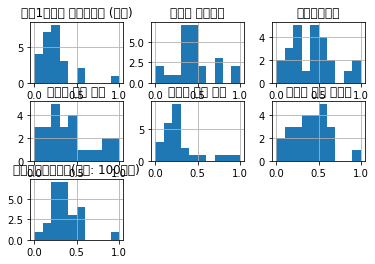

In [376]:
pd.DataFrame(district_feature_SS, columns = district_feature.columns).hist()
plt.show()

In [377]:
# 정규환된 자치구별 feature
district_feature_SS = pd.DataFrame(district_feature_SS, columns = district_feature.columns, index = district_feature.index)
district_feature_SS

,학생1만명당 사설학원수 (개소),월평균 가구소득,사교육비비중,편부모 가정 비율,다문화 가정 비율,공교육 환경 만족도,교육재정지원비용(단위: 100만원)
자치구별,,,,,,,
종로구,0.199572,0.766332,0.419753,0.171374,0.274627,0.196429,0.252879
중구,0.000000,0.325007,0.641975,0.283842,0.517548,0.285714,0.229168
용산구,0.059597,0.591058,0.185185,0.248710,0.415005,0.250000,0.180611
성동구,0.238386,0.743603,0.469136,0.255086,0.300774,0.625000,0.385274
광진구,0.240831,0.393992,0.234568,0.424590,0.259444,0.303571,0.342844
동대문구,0.205073,0.398538,0.802469,0.374034,0.283445,0.392857,0.372001
중랑구,0.080073,0.347830,0.271605,0.933617,0.285967,0.089286,0.416246
성북구,0.153729,0.445496,0.000000,0.407802,0.246629,0.464286,0.367349
강북구,0.092910,0.498594,0.246914,1.000000,0.244485,0.517857,0.236485


## 1.4 가중치 구하기

---


*   계층화 분석법(AHP)을 사용하여 가중치계산
*   현업에 종사하고 있는 초등교사 20명을 대상으로 각 변수의 중요도에 대한 설문 진행 (설문지 세부내용: https://naver.me/GGUJLTTD)
* 20명의 설문을 하나의 설문으로 병합하여 정리





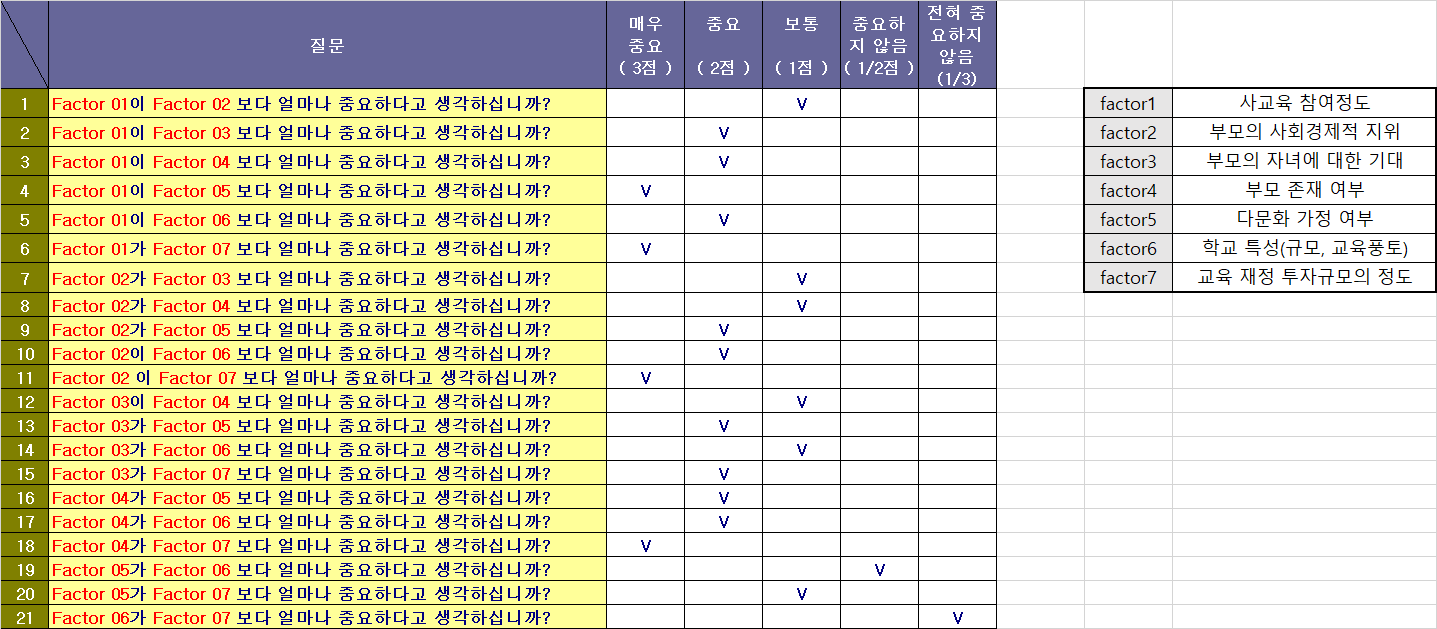

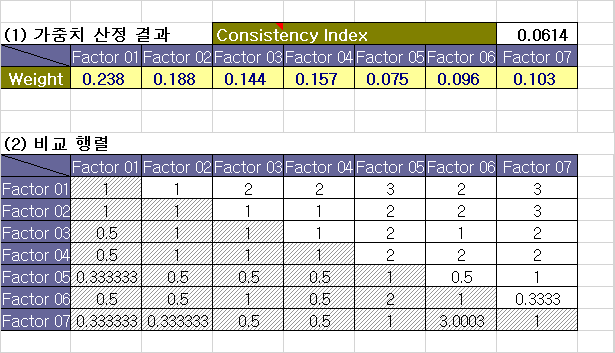

In [378]:
# 응답의 일관성지수(Consistency index)는 0.1 미만으로 신뢰할 수 있는 수준

In [379]:
# 가중치 설정
weight = [0.238, 0.188, 0.144, 0.157, 0.075, 0.096, 0.103]

In [380]:
# result 정렬
district_score = pd.DataFrame(district_feature_SS.dot(weight), columns = ['score'])
district_score_sort = district_score.sort_values(by = 'score')

In [381]:
district_score_sort

,score
자치구별,
용산구,0.264745
금천구,0.279891
성북구,0.285271
중구,0.287958
동작구,0.312603
광진구,0.315741
도봉구,0.334531
관악구,0.342866
중랑구,0.343031


In [382]:
# 교육 지수가 가장 낮은 4개의 구를 선정
district_score_sort[:4]

,score
자치구별,
용산구,0.264745
금천구,0.279891
성북구,0.285271
중구,0.287958


# 2. 프로그램을 배치할 최적의 초등학교 선정

---


*   방과후학교 프로그램이 적은 초등학교에 1순위로로 배치
*   진행하고 있는 방과후학교 프로그램 갯수가 같다면 방과후학교 참여 학생 수가 많은 학교에 우선순위 부여




## 2.1 data 불러오기

In [383]:
# 서울시 초등학교 데이터에서 학교명과 도로명주소 추출
file_elementry_info = '초등학교정보.csv'
elementry_info_all = pd.read_csv(dpath + file_elementry_info, encoding='cp949')
elementry_info = elementry_info_all[['학교명','도로명주소']]
elementry_info.head()

,학교명,도로명주소
0,서울숭신초등학교,서울특별시 성동구 마장로 161
1,한양초등학교,서울특별시 성동구 살곶이길 208
2,세종초등학교,서울특별시 광진구 군자로 114
3,성동초등학교,서울특별시 광진구 자양로4길 63
4,서울화양초등학교,서울특별시 광진구 군자로 9


In [384]:
# 방과후학교 프로그램 갯수 데이터 불러오기
file_afterschool_program = '2022년방과후학교운영.csv'
afterschool_program_all = pd.read_csv(dpath + file_afterschool_program)
afterschool_program_seoul = afterschool_program_all[afterschool_program_all['지역'].str.contains('서울특별시', na = False)]
afterschool_program = afterschool_program_seoul[['학교명', '프로그램수(계)', '방과후학교참여학생수']]
afterschool_program

,학교명,프로그램수(계),방과후학교참여학생수
0,서울교육대학교부설초등학교,12,163
1,서울대학교사범대학부설초등학교,52,301
2,서울개일초등학교,44,257
3,서울구룡초등학교,52,359
4,서울논현초등학교,20,175
...,...,...,...
600,서울하늘숲초등학교,16,514
601,서울항동초등학교,33,572
602,서울해누리초등학교,39,377
603,서울양원숲초등학교,0,0


In [385]:
# 서울시 초등학교 데이터와 방과후학교 프로그램수, 프로그램 참여 인원 join
elementry_data = pd.merge(elementry_info, afterschool_program, on='학교명')
elementry_data 

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
0,서울숭신초등학교,서울특별시 성동구 마장로 161,26,367
1,한양초등학교,서울특별시 성동구 살곶이길 208,89,666
2,세종초등학교,서울특별시 광진구 군자로 114,59,241
3,성동초등학교,서울특별시 광진구 자양로4길 63,36,256
4,서울화양초등학교,서울특별시 광진구 군자로 9,6,59
...,...,...,...,...
600,서울동답초등학교,서울특별시 동대문구 답십리로60길 12,38,291
601,서울답십리초등학교,서울특별시 동대문구 전농로3길 23,32,968
602,서울군자초등학교,서울특별시 동대문구 한천로6길 21,38,185
603,금성초등학교,서울특별시 중랑구 신내로21길 55,40,508


## 2.2 용산구내 프로그램 배정 학교선정

### 2.2.1 용산구 소재 초등학교 전체추출

In [386]:
elementry_yongsan = elementry_data[elementry_data['도로명주소'].str.contains('용산구', na = False)]
elementry_yongsan

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
319,신광초등학교,서울특별시 용산구 청파로 263,65,367
322,서울후암초등학교,서울특별시 용산구 두텁바위로 140,38,186
325,서울한남초등학교,서울특별시 용산구 한남대로 112,18,189
326,서울한강초등학교,서울특별시 용산구 한강대로14길 9,14,153
328,서울청파초등학교,서울특별시 용산구 효창원로 228,22,148
334,서울이태원초등학교,서울특별시 용산구 녹사평대로40길 19,21,119
335,서울원효초등학교,서울특별시 용산구 효창원로13길 38,16,228
336,서울용암초등학교,서울특별시 용산구 녹사평대로60길 39,9,86
337,서울용산초등학교,서울 용산구 한강대로57길 33,14,193
338,서울신용산초등학교,서울특별시 용산구 이촌로 255,54,189


### 2.2.2 용산구 소재 초등학교 방과후 프로그램 수 오름차순

In [387]:
elementry_yongsan_rank = elementry_yongsan.sort_values(by=['프로그램수(계)','방과후학교참여학생수'], ascending=[True, False])

### 2.2.3 용산구 소재 프로그램 우선배치 초등학교 결과

In [388]:
elementry_yongsan_rank.iloc[0:5,0]

344     서울보광초등학교
342     서울삼광초등학교
336     서울용암초등학교
341    서울서빙고초등학교
337     서울용산초등학교
Name: 학교명, dtype: object

#### 2.2.3.1 용산구 선정 초등학교 시각화

In [389]:
# 위도, 경도 반환
yongsan_address = elementry_yongsan_rank.iloc[0:5,1]

def geocoding(yongsan_address):
    try:
        geo = geo_local.geocode(yongsan_address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

yongsan_latitude = []
yongsan_longitude =[]

for i in yongsan_address:
    yongsan_latitude.append(geocoding(i)[0])
    yongsan_longitude.append(geocoding(i)[1])

In [390]:
# 용암초등학교,서빙고초등학교	위,경도 변환 오차 보완
yongsan_latitude[2:4] = (37.545109361358655,37.5215123602243)
yongsan_longitude[2:4] = (126.9893801471615,126.99213801527948)

In [391]:
# 위,경도 데이터 프레임 생성
yongsan_address_df = pd.DataFrame({'학교명':elementry_yongsan_rank.iloc[0:5,0],'도로명주소':yongsan_address,'위도':yongsan_latitude,'경도':yongsan_longitude})
yongsan_address_df

,학교명,도로명주소,위도,경도
344,서울보광초등학교,서울특별시 용산구 우사단로 20,37.532539,126.996182
342,서울삼광초등학교,서울특별시 용산구 두텁바위로1나길 19,37.546629,126.976605
336,서울용암초등학교,서울특별시 용산구 녹사평대로60길 39,37.545109,126.989380
341,서울서빙고초등학교,서울특별시 용산구 서빙고로51길 14,37.521512,126.992138
337,서울용산초등학교,서울 용산구 한강대로57길 33,37.534747,126.972467


In [392]:
# 자치구별 위,경도
gu = re_pe['자치구별']

def geocoding(gu):
    try:
        geo = geo_local.geocode(gu)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

gu_latitude = []
gu_longitude =[]

for i in gu:
    gu_latitude.append(geocoding(i)[0])
    gu_longitude.append(geocoding(i)[1])

In [393]:
# 용산구 추출
gu_address = pd.DataFrame({'자치구':re_pe['자치구별'],'위도':gu_latitude,'경도':gu_longitude})
yongsan_gu_address = gu_address[gu_address['자치구'] == '용산구']

In [394]:
# 용산구 선정 초등학교 시각화
map_youngsan = folium.Map(location=[yongsan_gu_address['위도'], yongsan_gu_address['경도']],zoom_start=14)
for i in range(len(yongsan_address_df)):
    folium.Marker([yongsan_latitude[i],yongsan_longitude[i]], icon=folium.Icon(color='blue', icon='star')).add_to(map_youngsan)
    folium.CircleMarker([yongsan_latitude[i],yongsan_longitude[i]],
                    radius = 30,
                    weight = 1,
                    color='skyblue',
                    fill_color='#000000').add_to(map_youngsan)

map_youngsan

## 2.3 금천구내 프로그램 배정 학교 선정

### 2.3.1 금천구 소재 초등학교 전체추출

In [395]:
elementry_geumcheon = elementry_data[elementry_data['도로명주소'].str.contains('금천구', na = False)]
elementry_geumcheon

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
424,서울금나래초등학교,서울특별시 금천구 시흥대로79길 37,36,465
426,서울탑동초등학교,서울특별시 금천구 탑골로 47-3,36,207
427,서울정심초등학교,서울특별시 금천구 독산로78다길 89,18,123
443,서울영남초등학교,서울특별시 금천구 문성로 62-15,9,152
445,서울안천초등학교,서울특별시 금천구 한내로 69-16,24,128
446,서울신흥초등학교,서울특별시 금천구 독산로36나길 21,34,193
452,서울시흥초등학교,서울특별시 금천구 독산로23길 26,0,0
455,서울백산초등학교,서울특별시 금천구 시흥대로38길 78,7,71
457,서울문성초등학교,서울특별시 금천구 시흥대로 460,13,74
458,서울문백초등학교,서울특별시 금천구 시흥대로47길 43-1,37,202


### 2.3.2 금천구 소재 초등학교 방과후 프로그램 수 오름차순

In [396]:
elementry_geumcheon_rank = elementry_geumcheon.sort_values(by=['프로그램수(계)','방과후학교참여학생수'], ascending=[True, False])
elementry_geumcheon_rank

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
452,서울시흥초등학교,서울특별시 금천구 독산로23길 26,0,0
475,서울금천초등학교,서울특별시 금천구 탑골로5길 60,6,65
455,서울백산초등학교,서울특별시 금천구 시흥대로38길 78,7,71
443,서울영남초등학교,서울특별시 금천구 문성로 62-15,9,152
457,서울문성초등학교,서울특별시 금천구 시흥대로 460,13,74
427,서울정심초등학교,서울특별시 금천구 독산로78다길 89,18,123
460,서울문교초등학교,서울특별시 금천구 독산로54길 102,22,148
487,서울가산초등학교,서울특별시 금천구 남부순환로 1304-11,23,146
476,서울금산초등학교,서울특별시 금천구 시흥대로24길 57,23,131
445,서울안천초등학교,서울특별시 금천구 한내로 69-16,24,128


### 2.3.3 금천구 소재 프로그램 우선배치 초등학교 결과

In [397]:
elementry_geumcheon_rank.iloc[0:5,0]

452    서울시흥초등학교
475    서울금천초등학교
455    서울백산초등학교
443    서울영남초등학교
457    서울문성초등학교
Name: 학교명, dtype: object

#### 2.3.3.1 금천구 선정 초등학교 시각화

In [398]:
# 위도, 경도 반환
geumcheon_address = elementry_geumcheon_rank.iloc[0:5,1]

def geocoding(geumcheon_address):
    try:
        geo = geo_local.geocode(geumcheon_address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

geumcheon_latitude = []
geumcheon_longitude =[]

for i in geumcheon_address:
    geumcheon_latitude.append(geocoding(i)[0])
    geumcheon_longitude.append(geocoding(i)[1])

In [399]:
# 문성초등학교 위,경도 변환 오차 보완
geumcheon_latitude[4] = 37.474588131243735
geumcheon_longitude[4] = 126.8993419438057

In [400]:
# 위,경도 데이터 프레임 생성
geumcheon_address_df = pd.DataFrame({'학교명':elementry_geumcheon_rank.iloc[0:5,0],'도로명주소':geumcheon_address,'위도':geumcheon_latitude,'경도':geumcheon_longitude})
geumcheon_address_df

,학교명,도로명주소,위도,경도
452,서울시흥초등학교,서울특별시 금천구 독산로23길 26,37.454901,126.904847
475,서울금천초등학교,서울특별시 금천구 탑골로5길 60,37.454531,126.912497
455,서울백산초등학교,서울특별시 금천구 시흥대로38길 78,37.447022,126.905010
443,서울영남초등학교,서울특별시 금천구 문성로 62-15,37.475548,126.909471
457,서울문성초등학교,서울특별시 금천구 시흥대로 460,37.474588,126.899342


In [401]:
# 금천구 추출
gu_address = pd.DataFrame({'자치구':re_pe['자치구별'],'위도':gu_latitude,'경도':gu_longitude})
geumcheon_gu_address = gu_address[gu_address['자치구'] == '금천구']

In [402]:
# 금천구 선정 초등학교 시각화
map_geumcheon = folium.Map(location=[geumcheon_gu_address['위도'], geumcheon_gu_address['경도']],zoom_start=14)
for i in range(len(geumcheon_address_df)):
    folium.Marker([geumcheon_latitude[i],geumcheon_longitude[i]], icon=folium.Icon(color='blue', icon='star')).add_to(map_geumcheon)
    folium.CircleMarker([geumcheon_latitude[i],geumcheon_longitude[i]],
                    radius = 30,
                    weight = 1,
                    color='skyblue',
                    fill_color='#000000').add_to(map_geumcheon)
    
map_geumcheon

## 2.4 성북구내 프로그램 배정 학교 선정

### 2.4.1 성북구 소재 초등학교 전체추출

In [403]:
elementry_seongbuk = elementry_data[elementry_data['도로명주소'].str.contains('성북구', na = False)]
elementry_seongbuk

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
154,우촌초등학교,서울특별시 성북구 성북로4길 52-1,13,122
156,성신초등학교,서울특별시 성북구 북악산로 918,29,262
157,매원초등학교,서울특별시 성북구 북악산로 870,122,494
158,대광초등학교,서울특별시 성북구 안암로 5,36,324
159,광운초등학교,서울특별시 성북구 한천로 694,70,598
161,서울청덕초등학교,서울특별시 성북구 정릉로9라길 11,2,14
162,서울정수초등학교,서울특별시 성북구 정릉로24길 58,27,154
163,서울정릉초등학교,서울특별시 성북구 솔샘로25가길 8,58,449
164,서울정덕초등학교,서울특별시 성북구 아리랑로 63,56,477
165,서울장위초등학교,서울특별시 성북구 장월로8가길 41,24,147


### 2.4.2 성북구 소재 초등학교 방과후 프로그램 수 오름차순

In [404]:
elementry_seongbuk_rank = elementry_seongbuk.sort_values(by=['프로그램수(계)','방과후학교참여학생수'], ascending=[True, False])
elementry_seongbuk_rank

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
161,서울청덕초등학교,서울특별시 성북구 정릉로9라길 11,2,14
192,서울동신초등학교,서울특별시 성북구 보문사길 50,10,166
154,우촌초등학교,서울특별시 성북구 성북로4길 52-1,13,122
187,서울삼선초등학교,서울특별시 성북구 보문로29길 106,16,230
183,서울성북초등학교,서울특별시 성북구 성북로 102-10,16,182
165,서울장위초등학교,서울특별시 성북구 장월로8가길 41,24,147
162,서울정수초등학교,서울특별시 성북구 정릉로24길 58,27,154
176,서울숭례초등학교,서울특별시 성북구 종암로5길 14,28,476
166,서울장월초등학교,서울특별시 성북구 한천로101길 66,28,217
156,성신초등학교,서울특별시 성북구 북악산로 918,29,262


### 2.4.3 성북구 소재 프로그램 우선배치 초등학교 결과

In [405]:
elementry_seongbuk_rank.iloc[0:5,0]

161    서울청덕초등학교
192    서울동신초등학교
154      우촌초등학교
187    서울삼선초등학교
183    서울성북초등학교
Name: 학교명, dtype: object

#### 2.4.3.1 성북구 선정 초등학교 시각화

In [406]:
# 위도, 경도 반환
seongbuk_address = elementry_seongbuk_rank.iloc[0:5,1]

def geocoding(seongbuk_address):
    try:
        geo = geo_local.geocode(seongbuk_address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

seongbuk_latitude = []
seongbuk_longitude =[]

for i in seongbuk_address:
    seongbuk_latitude.append(geocoding(i)[0])
    seongbuk_longitude.append(geocoding(i)[1])

In [407]:
# 청덕초등학교 위,경도 변환 누락 보완
seongbuk_latitude[0] = 37.612040185672726
seongbuk_longitude[0] = 127.00031995685642

In [408]:
# 위,경도 데이터 프레임 생성
seongbuk_address_df = pd.DataFrame({'학교명':elementry_seongbuk_rank.iloc[0:5,0],'도로명주소':seongbuk_address,'위도':seongbuk_latitude,'경도':seongbuk_longitude})
seongbuk_address_df

,학교명,도로명주소,위도,경도
161,서울청덕초등학교,서울특별시 성북구 정릉로9라길 11,37.612040,127.000320
192,서울동신초등학교,서울특별시 성북구 보문사길 50,37.582994,127.017647
154,우촌초등학교,서울특별시 성북구 성북로4길 52-1,37.595557,127.011685
187,서울삼선초등학교,서울특별시 성북구 보문로29길 106,37.585540,127.012140
183,서울성북초등학교,서울특별시 성북구 성북로 102-10,37.593255,126.999886


In [409]:
# 성북구 추출
gu_address = pd.DataFrame({'자치구':re_pe['자치구별'],'위도':gu_latitude,'경도':gu_longitude})
seongbuk_gu_address = gu_address[gu_address['자치구'] == '성북구']
seongbuk_gu_address

,자치구,위도,경도
7,성북구,37.59,127.0165


In [410]:
# 성북구 선정 초등학교 시각화
map_seongbuk = folium.Map(location=[seongbuk_gu_address['위도'], seongbuk_gu_address['경도']],zoom_start=14)
for i in range(len(seongbuk_address_df)):
    folium.Marker([seongbuk_latitude[i],seongbuk_longitude[i]], icon=folium.Icon(color='blue', icon='star')).add_to(map_seongbuk)
    folium.CircleMarker([seongbuk_latitude[i],seongbuk_longitude[i]],
                    radius = 30,
                    weight = 1,
                    color='skyblue',
                    fill_color='#000000').add_to(map_seongbuk)

map_seongbuk

## 2.5 중구내 프로그램 배정 학교 선정

### 2.5.1 중구 소재 초등학교 전체추출

In [411]:
elementry_jung = elementry_data[elementry_data['도로명주소'].str.contains('중구', na = False)]
elementry_jung

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
320,숭의초등학교,서울특별시 중구 소파로2길 10,6,95
321,서울흥인초등학교,서울특별시 중구 청구로6길 11,21,222
327,서울충무초등학교,서울 중구 퇴계로50길 13,20,169
330,서울청구초등학교,서울특별시 중구 다산로 170,24,346
333,서울장충초등학교,서울특별시 중구 청구로17길 40,18,200
339,서울신당초등학교,서울특별시 중구 난계로 141,18,171
343,서울봉래초등학교,서울특별시 중구 손기정로 73,55,322
348,서울덕수초등학교,서울특별시 중구 덕수궁길 140,44,257
350,서울남산초등학교,서울특별시 중구 퇴계로22길 17,53,197
353,서울광희초등학교,서울특별시 중구 다산로 269,18,219


### 2.5.2 중구 소재 초등학교 방과후 프로그램 수 오름차순

In [412]:
elementry_jung_rank = elementry_jung.sort_values(by=['프로그램수(계)','방과후학교참여학생수'], ascending=[True, False])
elementry_jung_rank

,학교명,도로명주소,프로그램수(계),방과후학교참여학생수
320,숭의초등학교,서울특별시 중구 소파로2길 10,6,95
353,서울광희초등학교,서울특별시 중구 다산로 269,18,219
333,서울장충초등학교,서울특별시 중구 청구로17길 40,18,200
339,서울신당초등학교,서울특별시 중구 난계로 141,18,171
327,서울충무초등학교,서울 중구 퇴계로50길 13,20,169
321,서울흥인초등학교,서울특별시 중구 청구로6길 11,21,222
330,서울청구초등학교,서울특별시 중구 다산로 170,24,346
348,서울덕수초등학교,서울특별시 중구 덕수궁길 140,44,257
350,서울남산초등학교,서울특별시 중구 퇴계로22길 17,53,197
343,서울봉래초등학교,서울특별시 중구 손기정로 73,55,322


### 2.5.3 중구 소재 프로그램 우선배치 초등학교 결과

In [413]:
elementry_jung_rank.iloc[0:5,0]

320      숭의초등학교
353    서울광희초등학교
333    서울장충초등학교
339    서울신당초등학교
327    서울충무초등학교
Name: 학교명, dtype: object

#### 2.5.3.1 중구 선정 초등학교 시각화

In [414]:
# 위도, 경도 반환
jung_address = elementry_jung_rank.iloc[0:5,1]

def geocoding(jung_address):
    try:
        geo = geo_local.geocode(jung_address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

jung_latitude = []
jung_longitude =[]

for i in jung_address:
    jung_latitude.append(geocoding(i)[0])
    jung_longitude.append(geocoding(i)[1])

In [415]:
# 숭의초등학교 위,경도 변환 오차 보완
jung_latitude[0] = 37.556396493908544
jung_longitude[0] = 126.9880770354359

In [416]:
# 위,경도 데이터 프레임 생성
jung_address_df = pd.DataFrame({'학교명':elementry_jung_rank.iloc[0:5,0],'도로명주소':jung_address,'위도':jung_latitude,'경도':jung_longitude})
jung_address_df

,학교명,도로명주소,위도,경도
320,숭의초등학교,서울특별시 중구 소파로2길 10,37.556396,126.988077
353,서울광희초등학교,서울특별시 중구 다산로 269,37.567558,127.015139
333,서울장충초등학교,서울특별시 중구 청구로17길 40,37.557297,127.011253
339,서울신당초등학교,서울특별시 중구 난계로 141,37.563975,127.023774
327,서울충무초등학교,서울 중구 퇴계로50길 13,37.561632,127.001839


In [417]:
# 중구 추출
gu_address = pd.DataFrame({'자치구':re_pe['자치구별'],'위도':gu_latitude,'경도':gu_longitude})
jung_gu_address = gu_address[gu_address['자치구'] == '중구']

In [418]:
# 중구 선정 초등학교 시각화
map_jung = folium.Map(location=[jung_gu_address['위도'], jung_gu_address['경도']],zoom_start=14)
for i in range(len(jung_address_df)):
    folium.Marker([jung_latitude[i],jung_longitude[i]], icon=folium.Icon(color='blue', icon='star')).add_to(map_jung)
    folium.CircleMarker([jung_latitude[i],jung_longitude[i]],
                    radius = 30,
                    weight = 1,
                    color='skyblue',
                    fill_color='#000000').add_to(map_jung)
    
map_jung

# 4. 결론

## 4.1 분석 결론



*   최적의 구로 용산구, 금천구, 성북구, 중구 4개의 구가 선정됨

*   용산구 프로그램 우선배치 초등학교
 1.  서울보광초등학교
 2. 서울삼광초등학교
 3. 서울용암초등학교
 4. 서울서빙고초등학교
 5. 서울용산초등학교
* 금천구 프로그램 우선배치 초등학교
 1. 서울시흥초등학교
 2. 서울금천초등학교
 3. 서울백산초등학교
 4. 서울영남초등학교
 5. 서울문성초등학교
* 성북구 프로그램 우선배치 초등학교
 1. 서울청덕초등학교
 2. 서울동신초등학교
 3. 우촌초등학교
 4. 서울삼선초등학교
 5. 서울성북초등학교
* 중구 프로그램 우선배치 초등학교
 1. 숭의초등학교
 2. 서울광희초등학교
 3. 서울장충초등학교
 4. 서울신당초등학교
 5. 서울충무초등학교


###4.1.1 최종 시각화

In [419]:
# 전체 위,경도 데이터 프레임 생성
df_list = [yongsan_address_df,geumcheon_address_df,seongbuk_address_df,jung_address_df]
all_address_df = pd.concat(df_list, ignore_index=True)
all_address_df

,학교명,도로명주소,위도,경도
0,서울보광초등학교,서울특별시 용산구 우사단로 20,37.532539,126.996182
1,서울삼광초등학교,서울특별시 용산구 두텁바위로1나길 19,37.546629,126.976605
2,서울용암초등학교,서울특별시 용산구 녹사평대로60길 39,37.545109,126.989380
3,서울서빙고초등학교,서울특별시 용산구 서빙고로51길 14,37.521512,126.992138
4,서울용산초등학교,서울 용산구 한강대로57길 33,37.534747,126.972467
5,서울시흥초등학교,서울특별시 금천구 독산로23길 26,37.454901,126.904847
6,서울금천초등학교,서울특별시 금천구 탑골로5길 60,37.454531,126.912497
7,서울백산초등학교,서울특별시 금천구 시흥대로38길 78,37.447022,126.905010
8,서울영남초등학교,서울특별시 금천구 문성로 62-15,37.475548,126.909471
9,서울문성초등학교,서울특별시 금천구 시흥대로 460,37.474588,126.899342


In [420]:
# 전체 초등학교 시각화
# 마커에 마우스 오버시 해당 초등학교 이름 표시
all_latitude = all_address_df['위도']
all_longitude = all_address_df['경도']
all_name = all_address_df['학교명']

map_all = folium.Map(location=[37.559819, 126.963895],zoom_start=11)

for i in range(len(all_address_df)):
    folium.Marker(location=[all_latitude[i], all_longitude[i]], tooltip= all_name[i] , icon=folium.Icon(color='blue', icon='star')).add_to(map_all)
    folium.CircleMarker([all_latitude[i],all_longitude[i]],
                    radius = 30,
                    weight = 1,
                    color='skyblue',
                    fill_color='#000000').add_to(map_all)
map_all

## 4.2 연구 실용성 및 활용방향

- 교육 격차 해소에 필요한 인력을 적절한 곳에 효율적으로 배치 가능
- 교육 격차에 영향을 가장 많이 미치는 지표 도출, 이를 통해 정책의 방향성 제시 가능
- 지표를 꾸준히 모니터링하며 각 지역 및 초등학교에 적절한 조치를 취할 수 있음